**Importing necessary libraries**

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
from itertools import cycle, islice

**Reading data from the csv file using pandas and loading the data**

In [125]:
df = pd.read_csv('WHO-COVID-19-global-data-3.csv')

**Using shape, able to identify the size of the data frame which gives in the format of (rows,columns)**

In [126]:
df.shape

(70030, 8)

**There are 68855 rows and 8 columns**

**Identifying the data types of all the columns in the dataframe**

In [127]:
df.dtypes

Date_reported         object
 Country_code         object
 Country              object
 WHO_region           object
 New_cases             int64
 Cumulative_cases      int64
 New_deaths            int64
 Cumulative_deaths     int64
dtype: object

**Using head function, identifying the first 5 rows of the data frame**

In [128]:
df.head(5) 

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


**Using head function, identifying the last 5 rows of the data frame**

In [129]:
df.tail(5)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
70025,2020-10-22,ZW,Zimbabwe,AFRO,28,8215,3,236
70026,2020-10-23,ZW,Zimbabwe,AFRO,27,8242,0,236
70027,2020-10-24,ZW,Zimbabwe,AFRO,15,8257,0,236
70028,2020-10-25,ZW,Zimbabwe,AFRO,12,8269,0,236
70029,2020-10-26,ZW,Zimbabwe,AFRO,7,8276,1,237


**Using sample and specifying n = 5 ,Looking at a random sample of 5**

In [130]:
df.sample(n=5, random_state=0)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
21825,2020-03-14,GF,French Guiana,AMRO,1,7,0,0
55064,2020-08-22,WS,Samoa,WPRO,0,0,0,0
35544,2020-03-25,LY,Libya,EMRO,1,1,0,0
7768,2020-01-23,BA,Bosnia and Herzegovina,EURO,0,0,0,0
48370,2020-04-06,PG,Papua New Guinea,WPRO,0,1,0,0


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70030 entries, 0 to 70029
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date_reported       70030 non-null  object
 1    Country_code       69732 non-null  object
 2    Country            70030 non-null  object
 3    WHO_region         70030 non-null  object
 4    New_cases          70030 non-null  int64 
 5    Cumulative_cases   70030 non-null  int64 
 6    New_deaths         70030 non-null  int64 
 7    Cumulative_deaths  70030 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 4.3+ MB


**Using describe function**

**The describe() method returns the general stats of the numeric columns in the dataframe.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data**

In [132]:
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,70030.000000,7.003000e+04,70030.000000,70030.000000
mean,613.541968,4.853669e+04,16.458718,1776.001157
std,4125.177235,3.543839e+05,108.368638,10862.687168
min,-8261.000000,0.000000e+00,-514.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000
50%,0.000000,2.520000e+02,0.000000,4.000000
75%,75.000000,5.900000e+03,1.000000,111.000000
max,97894.000000,8.485747e+06,6409.000000,223328.000000


In [133]:
df.columns = df.columns.str.strip()

**The duplicated() method returns a boolean series which is then used as a mask on the original dataframe. The output shows that no two records have the same country, state and date. So we can conclude that all observations in the dataset are unique.**

In [134]:
#checking for duplicate rows
duplicate_rows=df.duplicated(['Country','Country_code','Date_reported'])
df[duplicate_rows]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths


**There are no duplicate rows in this dataset.**

**The unique() method returns a unique values on the original dataframe. The output shows that the list of unique values in the dataset.**

In [135]:
#listing all the countries where the virus has spread to
country_list=list(df['Country'].unique())
print(country_list)
print(len(country_list))

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Côte d’Ivoire', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia', "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Falkland Islan

**There are 235 countries which have covid cases.**

**Changing date in date format and creating a column with month and year.**

In [137]:
df['Date_reported'] = pd.to_datetime(df['Date_reported'])
df['year_month'] = df['Date_reported'].dt.strftime('%b-%Y')

**Country which has highest cases in the country using idmax**

In [138]:
df.iloc[df['Cumulative_cases'].idxmax()]

Date_reported             2020-10-26 00:00:00
Country_code                               US
Country              United States of America
WHO_region                               AMRO
New_cases                               82626
Cumulative_cases                      8485747
New_deaths                                821
Cumulative_deaths                      223328
year_month                           Oct-2020
Name: 67049, dtype: object

**Creating a bar displaying the number of cases with specific to months.**

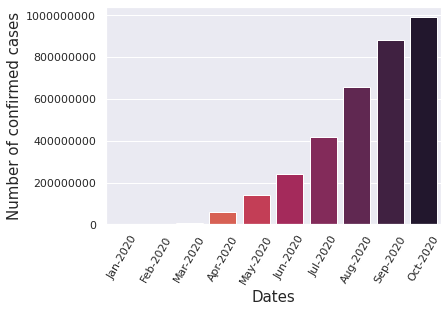

In [139]:
#sns.axes_style("whitegrid")
sns.barplot(
x="year_month", 
y="Cumulative_cases", data=df.groupby(['year_month']).sum().reset_index(drop=None).sort_values('Cumulative_cases'),palette = 'rocket_r')
plt.xticks(rotation=60)
plt.ylabel('Number of confirmed cases',fontsize=15)
plt.xlabel('Dates',fontsize=15)
plt.ticklabel_format(style='plain', axis='y')


**Creating a bar displaying the number of Death cases with specific to months.**

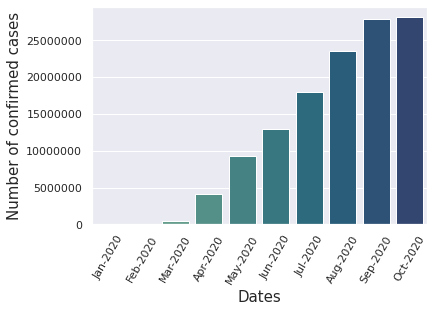

In [140]:
#sns.axes_style("whitegrid")
sns.barplot(
x="year_month", 
y="Cumulative_deaths", data=df.groupby(['year_month']).sum().reset_index(drop=None).sort_values('Cumulative_deaths'),palette = 'crest')
plt.xticks(rotation=60)
plt.ylabel('Number of Death cases',fontsize=15)
plt.xlabel('Dates',fontsize=15)
plt.ticklabel_format(style='plain', axis='y')


**Displaying the top 5 countries which have covid cases.**

In [141]:
data = df.groupby('Country')['Cumulative_cases'].sum().sort_values(ascending=False)[:5]

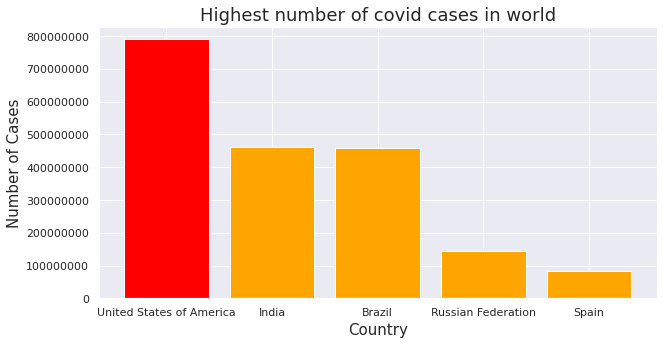

In [142]:
#plot the bar graph with different color to identify the highest number of dialysis centres
plt.figure(figsize=(10,5))
for i,v in data.iteritems():
    if i == 'United States of America':
        _=plt.bar(i,v,color='red')
    else:
        _=plt.bar(i,v,color='orange')

#Setting the titles, x and y labels        
_=plt.xlabel('Country',fontsize=15)
_=plt.ylabel('Number of Cases',fontsize=15)
_=plt.title('Highest number of covid cases in world',fontsize=18)
_=plt.xticks(rotation=0)
_=plt.ticklabel_format(style='plain', axis='y')
plt.show()

**United States of America has highest number of cases in the world.**

**Specifying the Mortality Rate.**

In [143]:
df['mrate'] = df['Cumulative_deaths']*100/df['Cumulative_cases']

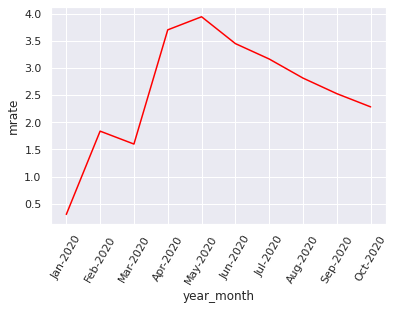

In [144]:
sns.lineplot(x = "year_month", y = "mrate", data=df,color = 'red')
plt.xticks(rotation=60)
plt.show()

**The mortality rate went above 3.5 in the month of April, May and June. Present, the rate is decreasing.**

**Calculating the Percentage Increase in Covid cases.**

In [145]:
data=df.groupby(['year_month']).sum().reset_index(drop=None).sort_values('year_month')
data

,year_month,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,mrate
0,Apr-2020,2336737,59254097,183788,4063819,23509.261743
1,Aug-2020,8045496,658873264,181174,23503114,18831.458801
2,Feb-2020,75897,1636370,2722,45160,1634.947822
3,Jan-2020,9906,37907,213,872,52.577470
4,Jul-2020,6933575,419285024,162843,17987872,21180.800319
5,Jun-2020,4235289,238584717,134345,13020726,22334.904823
6,Mar-2020,682941,8191025,37947,383421,7355.212270
7,May-2020,2835742,139384030,141931,9340845,26331.829454
8,Oct-2020,9398962,991038252,147189,28142054,12892.077881
9,Sep-2020,8411799,882739408,160452,27885478,16368.868167


In [152]:
Increase = ((data['Cumulative_cases'].max() - data['Cumulative_cases'].min()) / data['Cumulative_cases'].max()) * 100
print("The percentage increase in the number of cases till now from Jan :" , Increase)

The percentage increase in the number of cases till now from Jan : 99.99617502150664


**There is 99% increase in covid cases since Jan.**

**Conclusions:**
* There are 235 countries which have covid cases.
* United States of America has highest number of cases in the world.
* The mortality rate went above 3.5 in the month of April, May and June. Present, the rate is decreasing.
* There is 99% increase in Covid cases since Jan 2020.

**Learned:**
* Different visualization techniques
* Setting individual bar labels
* Using functions in pandas